# **Using Topic Modeling to Understand News Articles Regarding Digital Readiness Index**
---
Pichaya Charoonpongsakdi (Anik) <br>
GA-TDA DSI Capstone Project

[>>>Link to the presentation<<<](https://docs.google.com/presentation/d/1TooN8ycOvl-FB0gWikqjoO2LvPg2Vlh-09dW1wUhXB8/edit?usp=sharing)

## **Part 0: Problem Statement**
---

Digital Council of Thailand (DCT) is currently focusing on boosting the **IMD World Digital Competitiveness Ranking (WDCR)** as a key-driver for Thailand's digital transformation and readiness. The ranking is conducted by the Swiss-based Institute of Management Development (IMD) and is used as a benchmarking standard by government and private sectors across the globe. For 2022, Thailand fares in the lower half at rank 40th out of 64 countries, dropping 2 ranks from last year. <br>

Digital Council of Thailand aims at driving the rank to the 25th by 2025. The question is: how can we climb up the current gap and achieve the 25th within 3 years? The only way is to boost the subfactor ranking so that these will lead to the improvement of overall ranking of Thailand. <br>

The ranking are based on 3 factors - Knowledge, Technology and Future Readiness, which can further be divided into 9 subfactors and 54 indicators, as shown in the picture below.

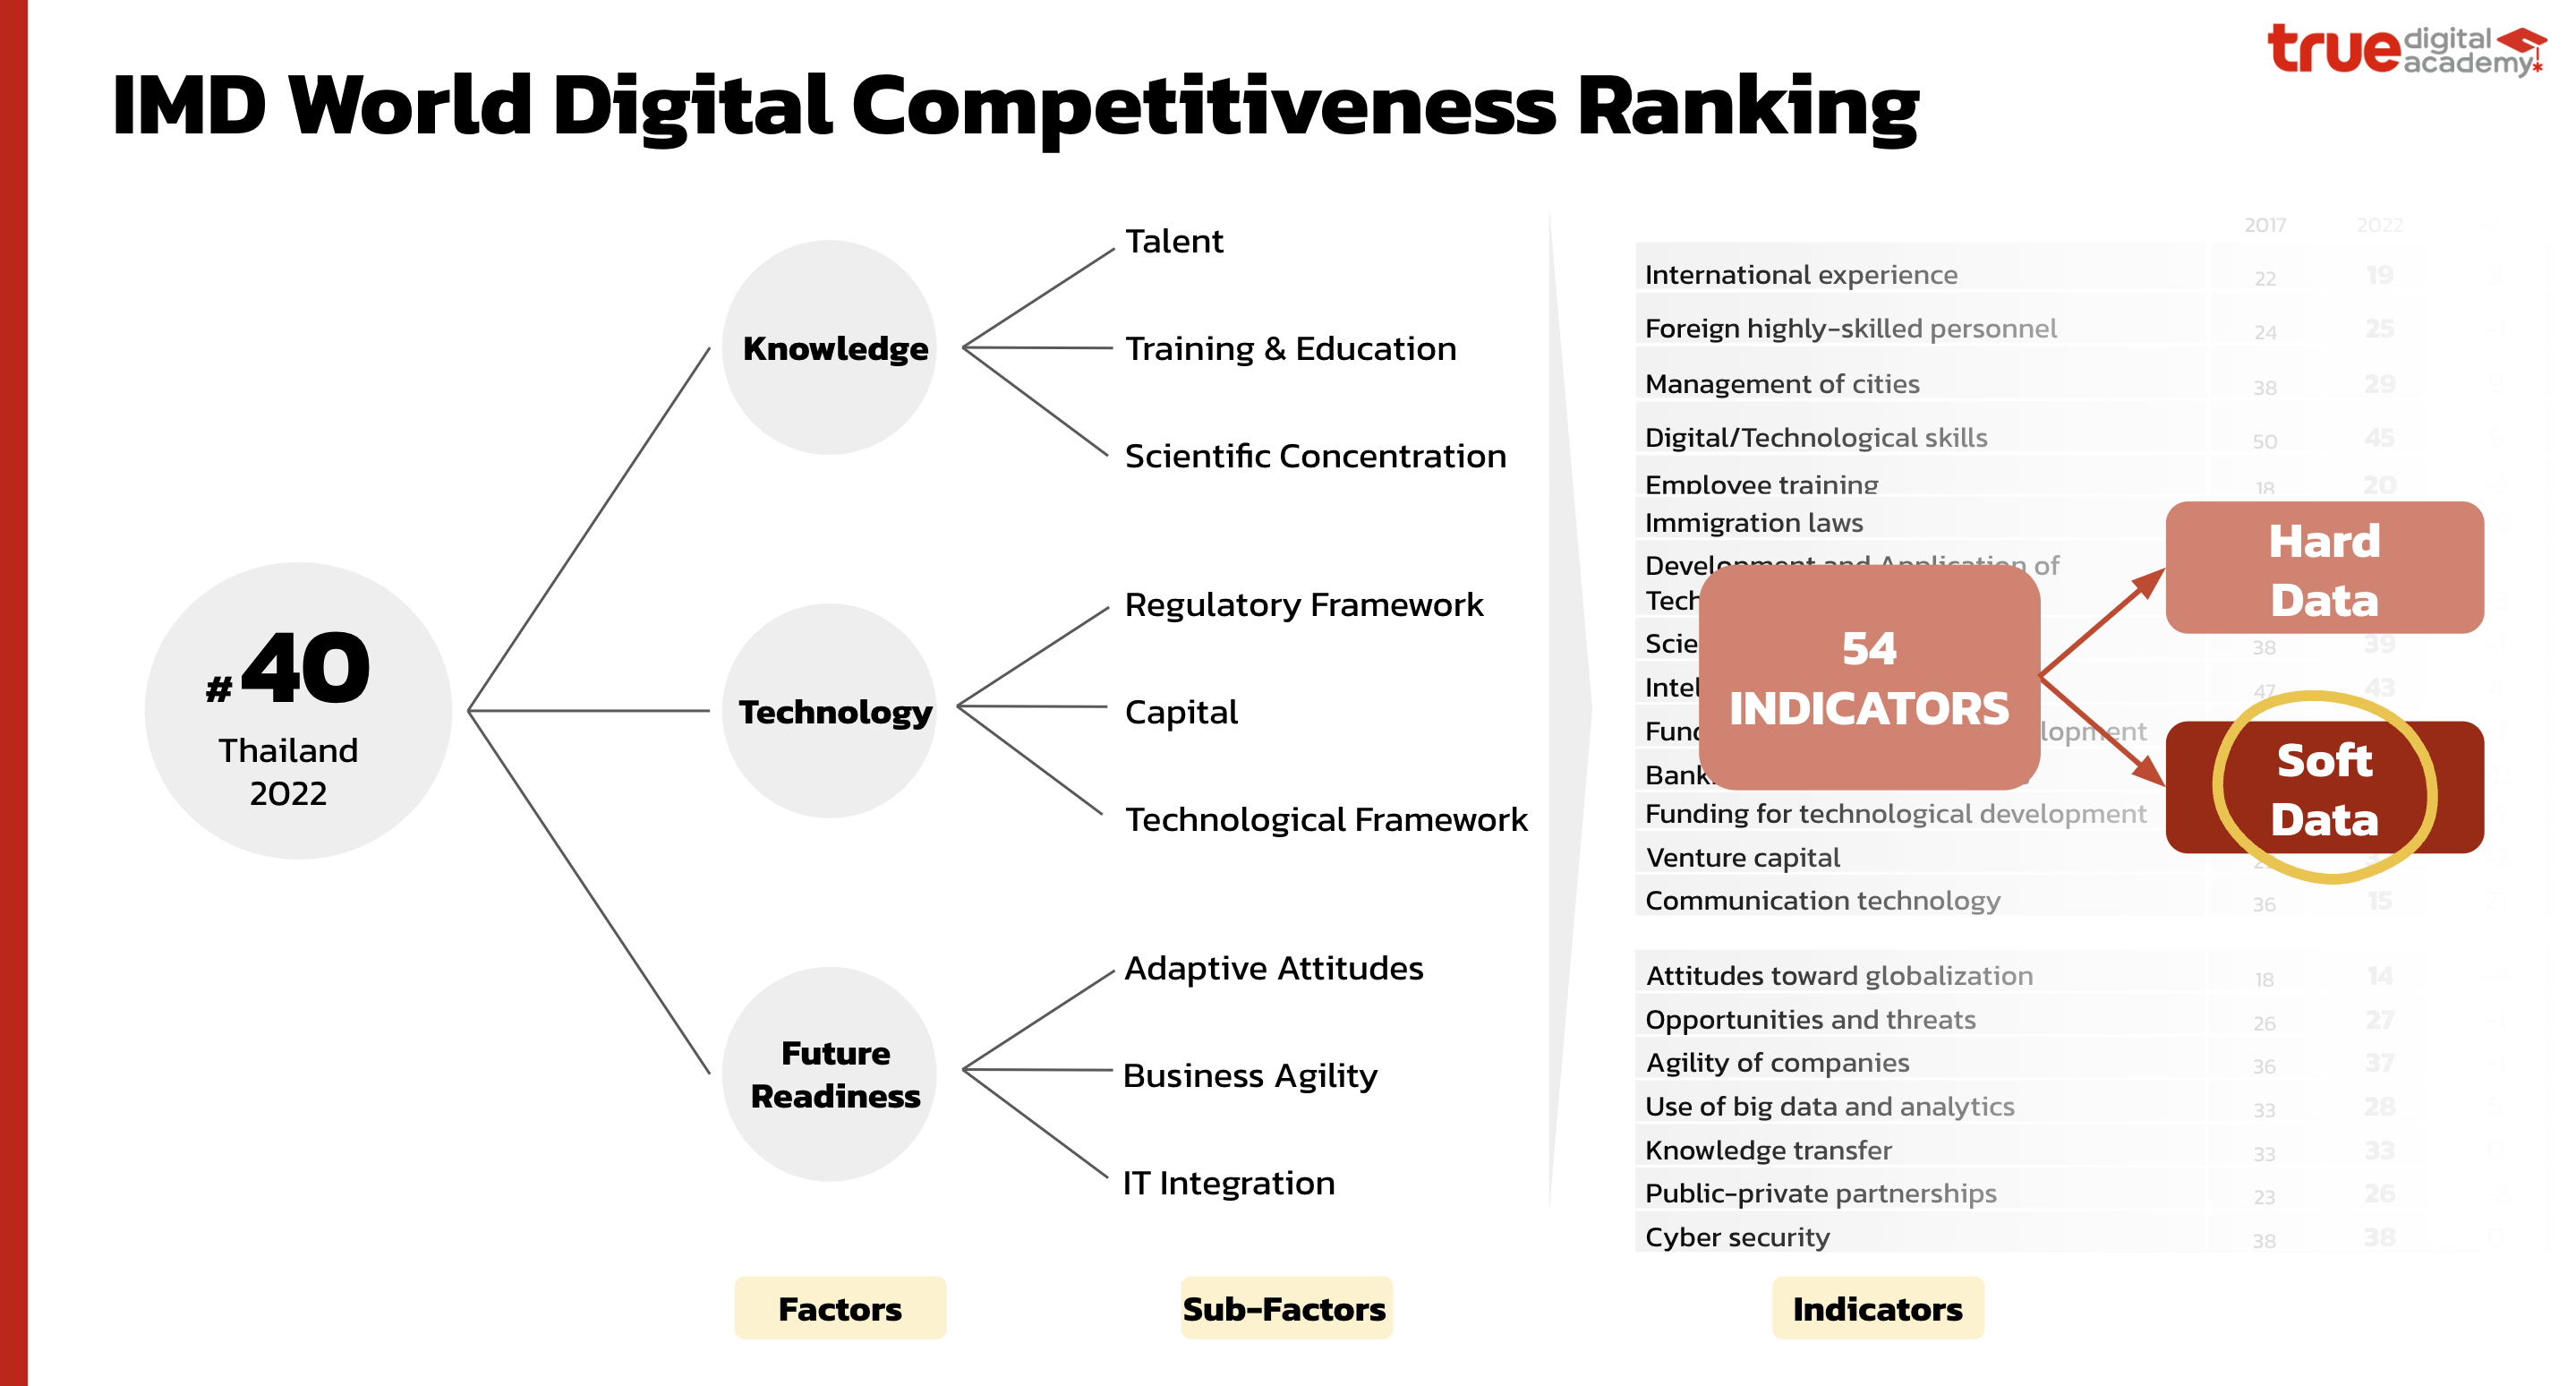

The indicators for World Digital Competitiveness Ranking (WDCR) are based on both **'hard data'**, meaning that the indicators are evaluated on numerical data e.g. internet penetration rate, student-teacher ratio, number of graduates in Science etc., and **'soft data'**, meaning that the indicators are evaluated based on non-numerical data e.g. expert interviews and surveys. On the side of hard-data based indicators, there are reports available for policy makers to conduct further analysis. However, analyzing the soft data based indicators is not easy. Research and close reading might be a way to analyze these indicators, but this means the analyst must go through the vast amount of text data to find insights. Comprehensive analysis on text data is thus out of human reach. <br>

Hence, the unsupervised topic modeling algorithm comes into play, where it helps extracting topics from the vast amount of unstructured text data, groups the related topics together and provide the most related documents. These can help reduce search time and also increase the possibility to get to an accurate article.

**Project Objective** <br>
- Filtering & extracting news articles related to Digital Competitiveness Ranking indicators for further analysis and close readings


## **Part I: Data Preparation**
---

#### Install and Import Libraries

In [1]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLP Libraries
from pythainlp.tokenize import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from tqdm import tqdm 

# Set default Thai font
mpl.font_manager.fontManager.addfont('./THSarabunNew/THSarabunNew.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)

### 1. Load Datasets

The project uses newspaper article as corpus since newspaper are deemed as a reflection of time period in which reports on various events and opinions are stored. Moreover, the content are multi-dimensional, coming from both government, private sectors and, in some cases, public audiences. 

BangkokBiz and Matichon are the two newspaper selected as project corpus because they are both quality newspapers. BangkokBiz focuses mainly on business articles, whereas the contents on Matichon are more general.
The corpuses are articles scraped from BangkokBiz news and Matichon website, ranging from 2014 to 2022.

In [2]:
# Import datasets
bkkbiz = pd.read_json('../datasets/bkkbiz_update.json')
matichon = pd.read_json('../datasets/matichon.json')

In [3]:
# Check shape
bkkbiz.shape

(361228, 7)

In [4]:
# Check head
bkkbiz.head()

,ID,date,category,title,description,article,url
0,620001,2014-11-27 08:01:00,ต่างประเทศ,น้ำมันดิบปิดร่วง-คาดโอเปคไม่ลดกำลังผลิต,น้ำมันดิบปิดร่วงแตะระดับต่ำสุดในรอบ 4 ปี-คาดโอ...,สัญญาน้ำมันดิบตลาดล่วงหน้าสหรัฐ ปิดตลาดปรับตัว...,https://www.bangkokbiznews.com/news/detail/620001
1,620002,2014-11-27 08:20:00,ต่างประเทศ,ทองคำปิดร่วงหลังสหรัฐเผยข้อมูลเศรษฐกิจ,สัญญาทองคำตลาดล่วงหน้าสหรัฐ ปิดปรับตัวลงเล็กน้...,สัญญาทองคำตลาดล่วงหน้าสหรัฐ ปิดปรับตัวลงเล็กน้...,https://www.bangkokbiznews.com/news/detail/620002
2,620009,2014-11-27 09:34:00,การเงิน-การลงทุน,"ทองแท่งขายออก18,600บ.ไม่เปลี่ยนแปลง","ราคาทองคำวันนี้ทองแท่งขายออกบาทละ 18,600 บาท ท...",สมาคมค้าทองคำรายงานราคาทอง 96.5% ประจำวันที่ 2...,https://www.bangkokbiznews.com/news/detail/620009
3,620010,2014-11-27 09:36:00,การเงิน-การลงทุน,เงินบาทเปิด32.75/77คาดแกว่งแคบ,ค่าเงินบาทเปิดที่ 32.75/77 บาท/ดอลลาร์ คาดแกว่...,นักบริหารเงินจากธนาคารพาณิชย์ เปิดเผยว่า เงินบ...,https://www.bangkokbiznews.com/news/detail/620010
4,620011,2014-11-27 09:48:00,การเงิน-การลงทุน,คาดหุ้นเช้าแกว่งไซด์เวย์,โบรกฯ คาดหุ้นเช้านี้แกว่งไซด์เวย์ช่วงไร้ปัจจัย...,นายอภิชาติ ผู้บรรเจิดกุล ผู้อำนวยการสายงานวิเค...,https://www.bangkokbiznews.com/news/detail/620011


In [5]:
# Check shape
matichon.shape

(432901, 6)

In [6]:
# Check head
matichon.head()

,headline,article,date,category,url,id
0,ผบ.ทร.งง! ขอ'เรือดำน้ำ'ถูกโวย แต่อย่างอื่นนิ่ง...,วันที่ 7 มีนาคม พล.ร.อ.ไกรสร จันทร์สุวานิชย์ ผ...,2015-07-08 06:49:57,politics,https://www.matichon.co.th/politics/news_38,38
1,ปล่อยวัชพืช-พร่องน้ำ ภาพรวมน้ำอ่างยังไม่ถึง50เ...,17 ส.ค. – นายพัฒนะ พลศรี หัวหน้าฝ่ายส่งน้ำและบ...,2015-08-17 10:51:32,local,https://www.matichon.co.th/local/news_68,68
2,นายกฯโอดน้องผมทำอะไรผิด ยันผบ.ทบ.ต้องโตด้วยตัว...,พลเอกประยุทธ์ จันทร์โอชา นายกรัฐมนตรี และหัวหน...,2015-08-11 09:48:08,politics,https://www.matichon.co.th/politics/news_75,75
3,อนาคตทางการเมือง ของกปปส.และสุเทพ,คำแถลงของคุณสุเทพ เทือกสุบรรณ หลังลาสิกขาดูเหม...,2015-08-13 11:29:16,columnists,https://www.matichon.co.th/columnists/news_79,79
4,โสมแดงกร้าว! ขู่ตอบโต้รุนแรง หากสหรัฐไม่ยุติซ้...,(16 ส.ค.58) สำนักข่าวซีเอ็นเอ็นรายงานว่า ทางกา...,2015-08-16 10:26:54,foreign,https://www.matichon.co.th/foreign/news_86,86


### 2. Data Cleaning


Check the following issues:
- column names
- null values
- data types

#### 2.1 BangkokBiz

In [7]:
# Convert column heads to lower case
bkkbiz.columns.str.lower()

Index(['id', 'date', 'category', 'title', 'description', 'article', 'url'], dtype='object')

In [8]:
# Check nulls 
bkkbiz.isnull().sum()

ID             0
date           0
category       0
title          0
description    0
article        0
url            0
dtype: int64

In [9]:
# Check dtypes
bkkbiz.dtypes

ID                      int64
date           datetime64[ns]
category               object
title                  object
description            object
article                object
url                    object
dtype: object

#### 2.2 Matichon

In [10]:
# Convert column heads to lower case
matichon.columns.str.lower()

Index(['headline', 'article', 'date', 'category', 'url', 'id'], dtype='object')

In [11]:
# Check nulls
matichon.isnull().sum()

headline    0
article     0
date        0
category    0
url         0
id          0
dtype: int64

In [12]:
# Check dtypes
matichon.dtypes

headline    object
article     object
date        object
category    object
url         object
id           int64
dtype: object

In [13]:
# Convert 'date' to datetime
matichon['date'] = pd.to_datetime(matichon['date'], utc=True)

In [14]:
# Recheck dtypes
matichon.dtypes

headline                 object
article                  object
date        datetime64[ns, UTC]
category                 object
url                      object
id                        int64
dtype: object

In [15]:
# Rename column from 'headline' to 'article'
matichon.rename(columns={'headline':'title'}, inplace=True)

In [16]:
# Recheck
matichon.head()

,title,article,date,category,url,id
0,ผบ.ทร.งง! ขอ'เรือดำน้ำ'ถูกโวย แต่อย่างอื่นนิ่ง...,วันที่ 7 มีนาคม พล.ร.อ.ไกรสร จันทร์สุวานิชย์ ผ...,2015-07-08 06:49:57+00:00,politics,https://www.matichon.co.th/politics/news_38,38
1,ปล่อยวัชพืช-พร่องน้ำ ภาพรวมน้ำอ่างยังไม่ถึง50เ...,17 ส.ค. – นายพัฒนะ พลศรี หัวหน้าฝ่ายส่งน้ำและบ...,2015-08-17 10:51:32+00:00,local,https://www.matichon.co.th/local/news_68,68
2,นายกฯโอดน้องผมทำอะไรผิด ยันผบ.ทบ.ต้องโตด้วยตัว...,พลเอกประยุทธ์ จันทร์โอชา นายกรัฐมนตรี และหัวหน...,2015-08-11 09:48:08+00:00,politics,https://www.matichon.co.th/politics/news_75,75
3,อนาคตทางการเมือง ของกปปส.และสุเทพ,คำแถลงของคุณสุเทพ เทือกสุบรรณ หลังลาสิกขาดูเหม...,2015-08-13 11:29:16+00:00,columnists,https://www.matichon.co.th/columnists/news_79,79
4,โสมแดงกร้าว! ขู่ตอบโต้รุนแรง หากสหรัฐไม่ยุติซ้...,(16 ส.ค.58) สำนักข่าวซีเอ็นเอ็นรายงานว่า ทางกา...,2015-08-16 10:26:54+00:00,foreign,https://www.matichon.co.th/foreign/news_86,86


### 3. Exploratory Data Analysis (EDA)

Decide on project scope by analyzing the following topics
- Number of articles in each  subcategories
- Number of articles by year released
- Number of articles by year and top sub-categories

#### 3.1 Bangkok Business (กรุงเทพธุรกิจ)

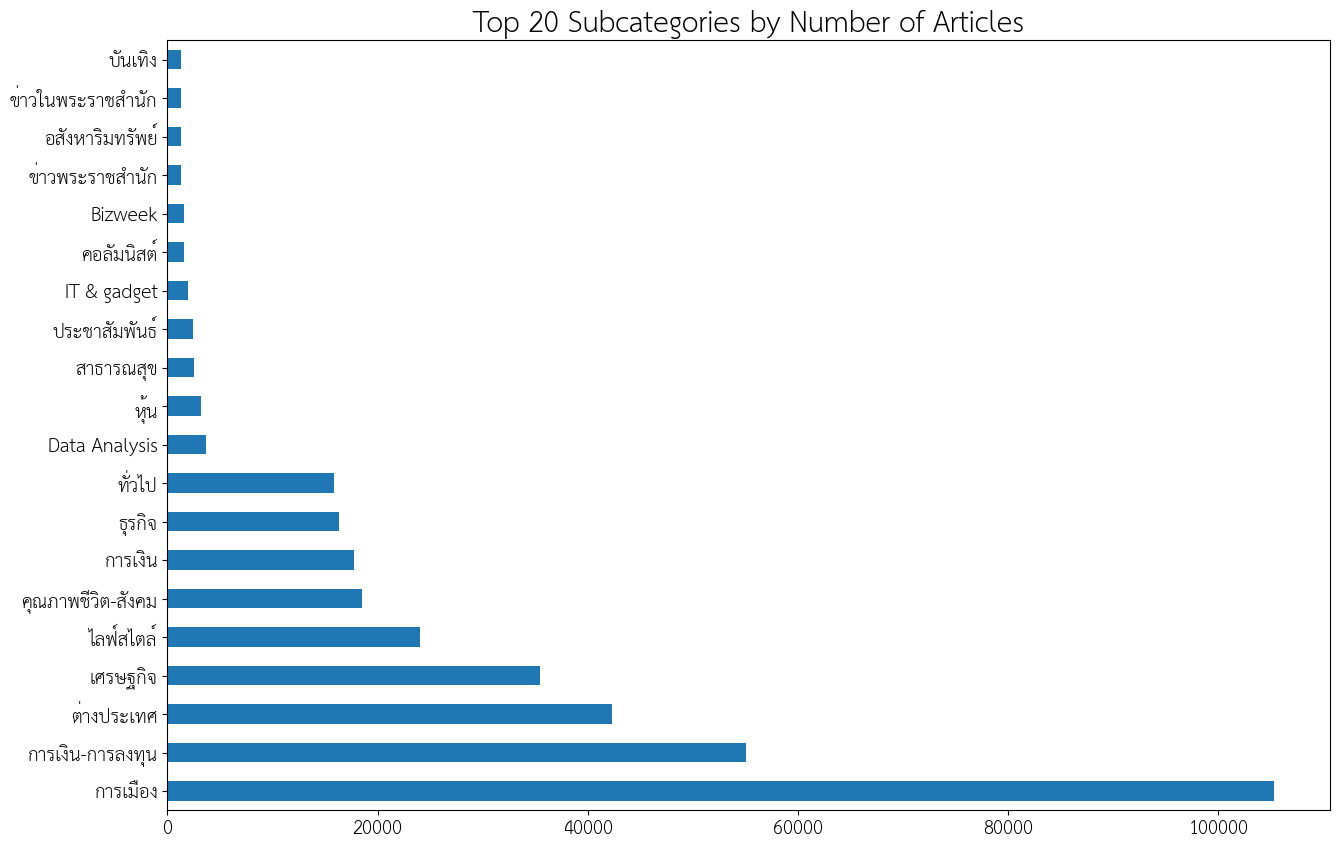

In [17]:
# Top 20 subcategories by number of articles
plt.figure(figsize=(15,10))
plt.title('Top 20 Subcategories by Number of Articles', size=30)
bkkbiz['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');

In [18]:
# Time released
bkkbiz['date'].dt.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [19]:
# Number of articles by year
bkkbiz.groupby(bkkbiz['date'].dt.year)['title'].count()

date
2014     4646
2015    51297
2016    25825
2017    51332
2018    34992
2019    36653
2020    53321
2021    63939
2022    39223
Name: title, dtype: int64

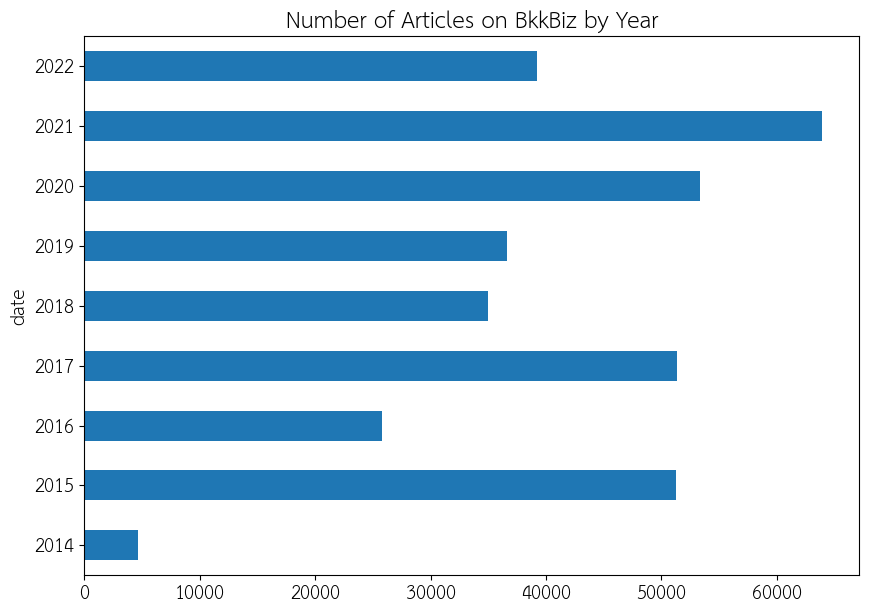

In [20]:
# Number of article by year
plt.figure(figsize=(10,7))
plt.title('Number of Articles on BkkBiz by Year')
bkkbiz.groupby(bkkbiz['date'].dt.year)['title'].count().plot(kind='barh');

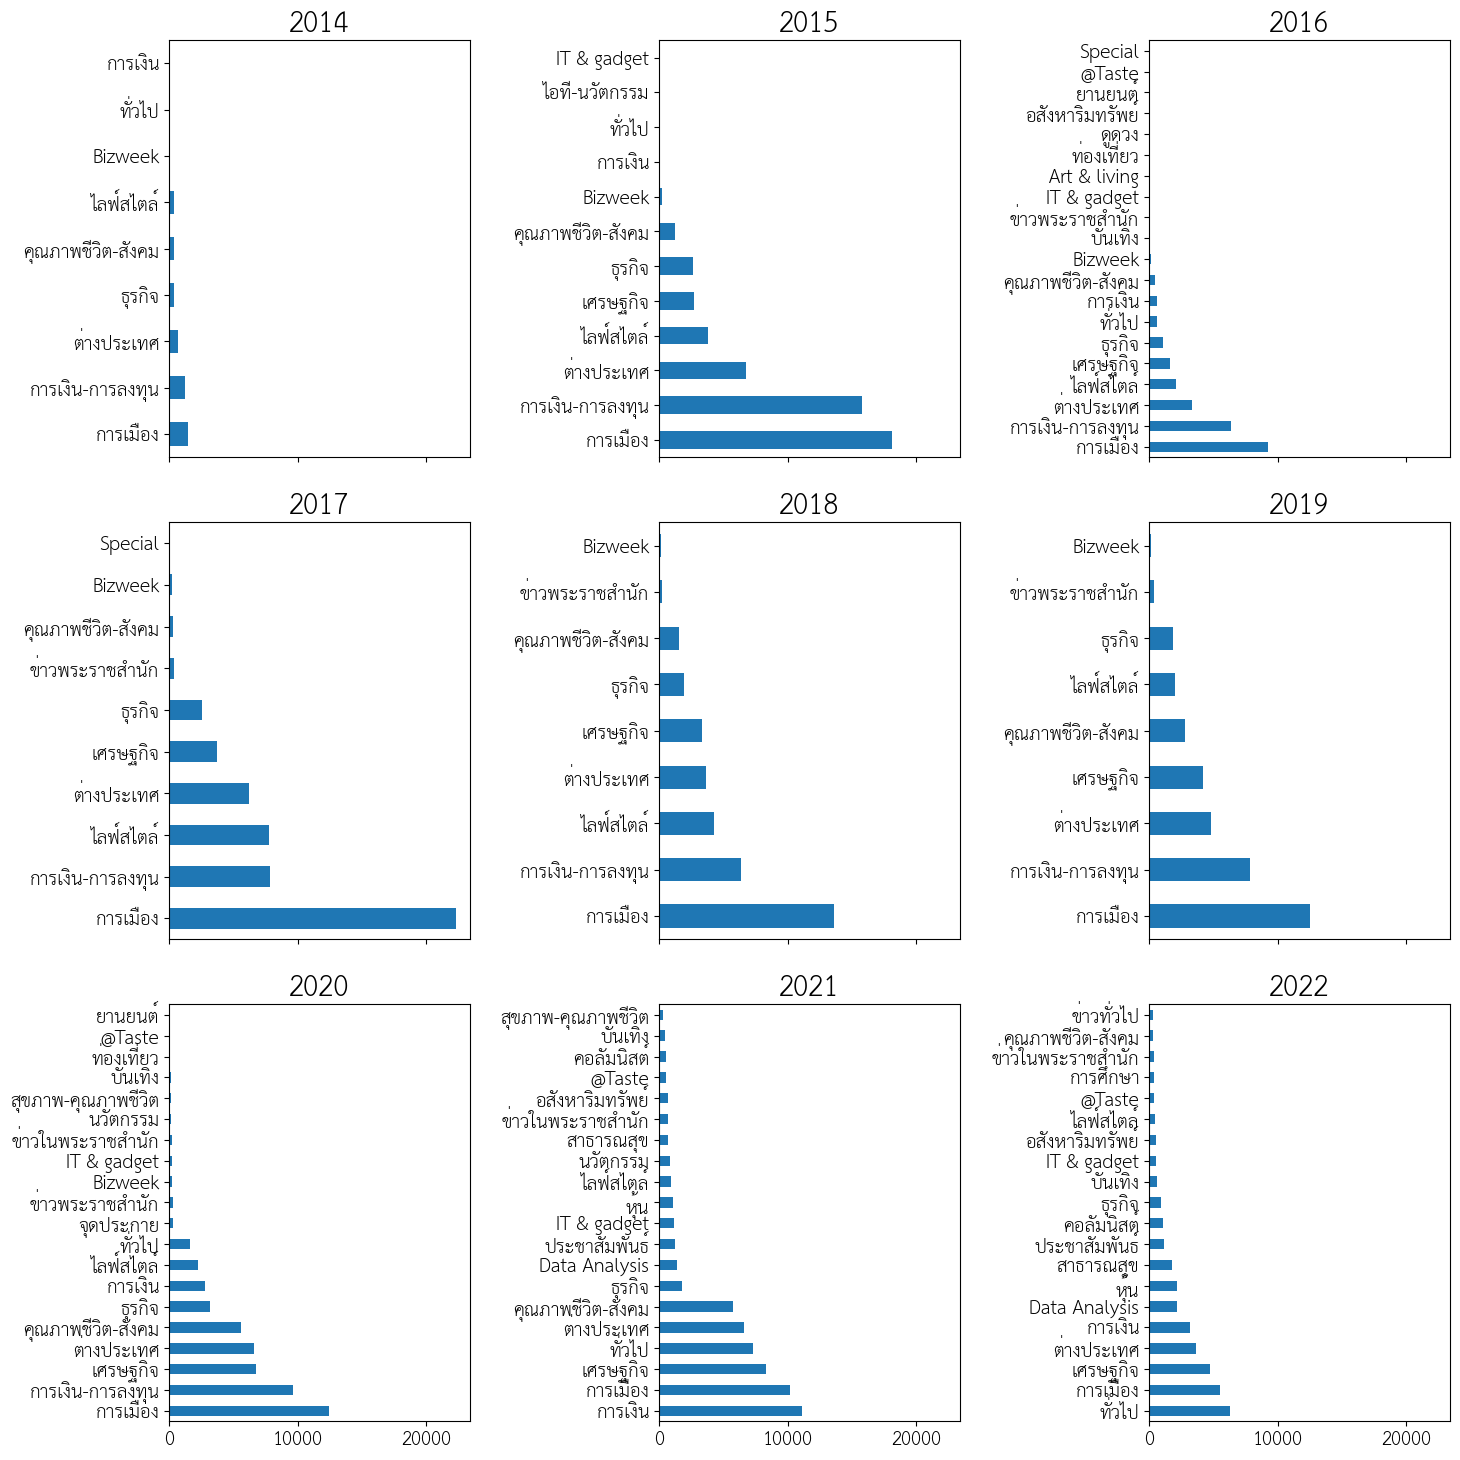

In [21]:
# Number of articles by category by year
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

fig, axs = plt.subplots(3,3, figsize=(15,15), sharex=True)
for n, year in enumerate(years):
  plt.subplot(3,3,n+1)
  plt.title(year, size=30)
  plt.tight_layout()
  bkkbiz[bkkbiz['date'].dt.year==year]['category'].value_counts().head(20).plot(kind='barh');

In [22]:
bkkbiz['category'].unique()

array(['ต่างประเทศ', 'การเงิน-การลงทุน', 'การเมือง', 'คุณภาพชีวิต-สังคม',
       'ธุรกิจ', 'ไลฟ์สไตล์', 'Bizweek', 'ทั่วไป', 'การเงิน', 'เศรษฐกิจ',
       'ไอที-นวัตกรรม', 'IT & gadget', 'ท่องเที่ยว', 'Art & living',
       'บันเทิง', 'ยานยนต์', 'อสังหาริมทรัพย์', 'ดูดวง', '@Taste',
       'ข่าวพระราชสำนัก', 'Special', 'จุดประกาย', 'Data Analysis',
       'ข่าวในพระราชสำนัก', 'นวัตกรรม', 'สุขภาพ-คุณภาพชีวิต',
       'สิ่งแวดล้อม', 'ข่าวทั่วไป', 'เศรษฐกิจ-ธุรกิจ', 'ประชาสัมพันธ์',
       'CEO Blog', 'คอลัมนิสต์', 'การศึกษา', 'ความงาม-แฟชั่น',
       'Training Course', 'Biz2U', 'หุ้น', 'Corporate Moves', 'ลอตเตอรี่',
       'สาธารณสุข', 'แรงงาน', 'เทคโนโลยี', 'คุณภาพชีวิต'], dtype=object)

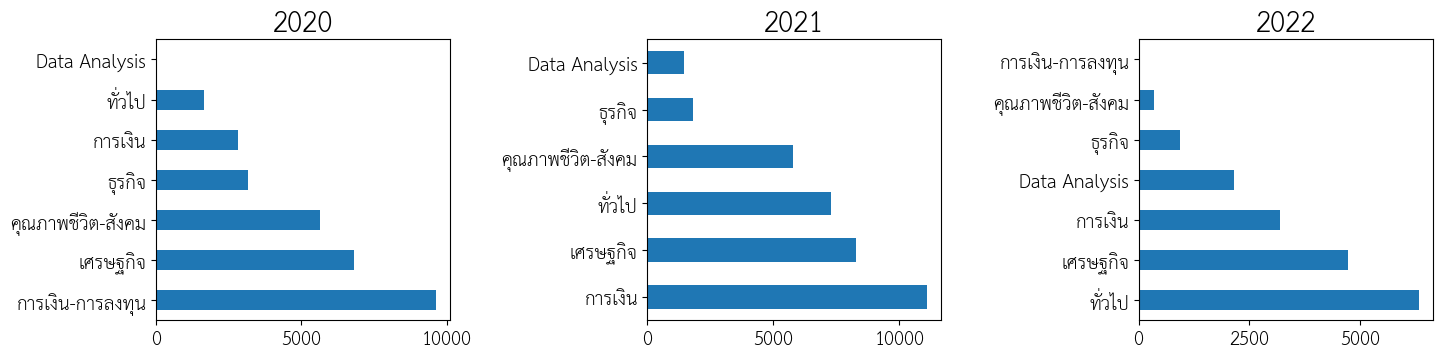

In [23]:
# Number of articles by selected 7 categories from 2020 to 2022
#fig, ax = plt.subplots(4,2, figsize=(15,30))
years = [2020, 2021, 2022]
category = ['การเงิน-การลงทุน', 'การเงิน', 'เศรษฐกิจ', 'คุณภาพชีวิต-สังคม', 'ธุรกิจ', 'Data Analysis', 'ทั่วไป']

fig, axs = plt.subplots(3,3, figsize=(15,4), sharex=True)
for n, year in enumerate(years):   
    plt.subplot(1,3,n+1)
    plt.title(year, size=30)
    plt.tight_layout()
    bkkbiz[(bkkbiz['date'].dt.year==year) & (bkkbiz['category'].isin(category))]['category'].value_counts().head(20).plot(kind='barh')

**Key Findings from EDA on BkkBiz Dataset**
- There are inconsistent number of articles released by year.
- At the same time, the number of sub-categories varies each year.
- Considering the number of articles, year released, sub-categories and the relevance of data, it is a good idea to scope down the dataset to include only articles from 2020-2022 from the following 7 categories: 
    1) Finance and Investment (การเงินขการลงทุน) 
    2) Finance (การเงิน) 
    3) Economics (เศรษฐศาสตร์) 
    4) Quality of Life (คุณภาพชีวิต-สังคม) 
    5) Business (ธุรกิจ) 
    6) Data Analysis
    7) General (ทั่วไป)

#### 3.2 Matichon 

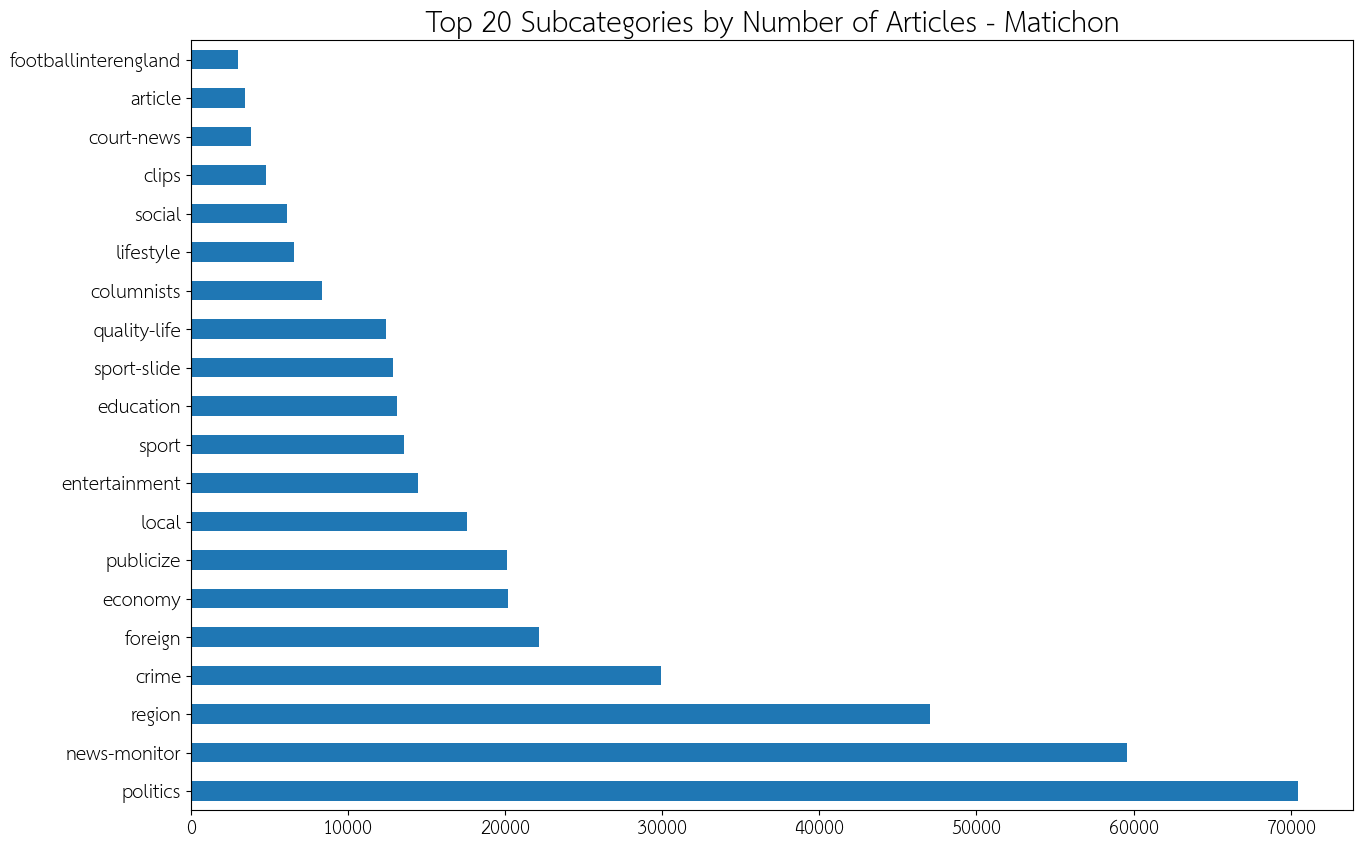

In [24]:
# Top 20 subcategories by number of articles
plt.figure(figsize=(15,10))
plt.title('Top 20 Subcategories by Number of Articles - Matichon', size=30)
matichon['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');

In [25]:
# Time released
matichon['date'].dt.year.unique()

array([2015, 2016, 2018, 2019, 2017, 2014, 2020, 2021])

In [26]:
# Number of Article by Year
matichon.groupby(matichon['date'].dt.year)['title'].count()

date
2014        1
2015      199
2016    69443
2017    72300
2018    88322
2019    89246
2020    99897
2021    13493
Name: title, dtype: int64

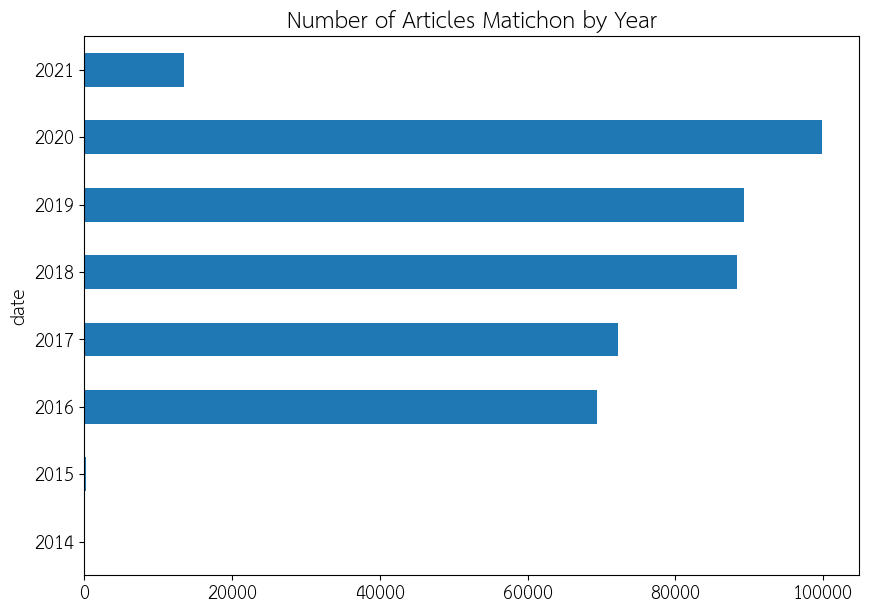

In [27]:
# Number of Article by Year
plt.figure(figsize=(10,7))
plt.title('Number of Articles Matichon by Year')
matichon.groupby(matichon['date'].dt.year)['title'].count().plot(kind='barh');

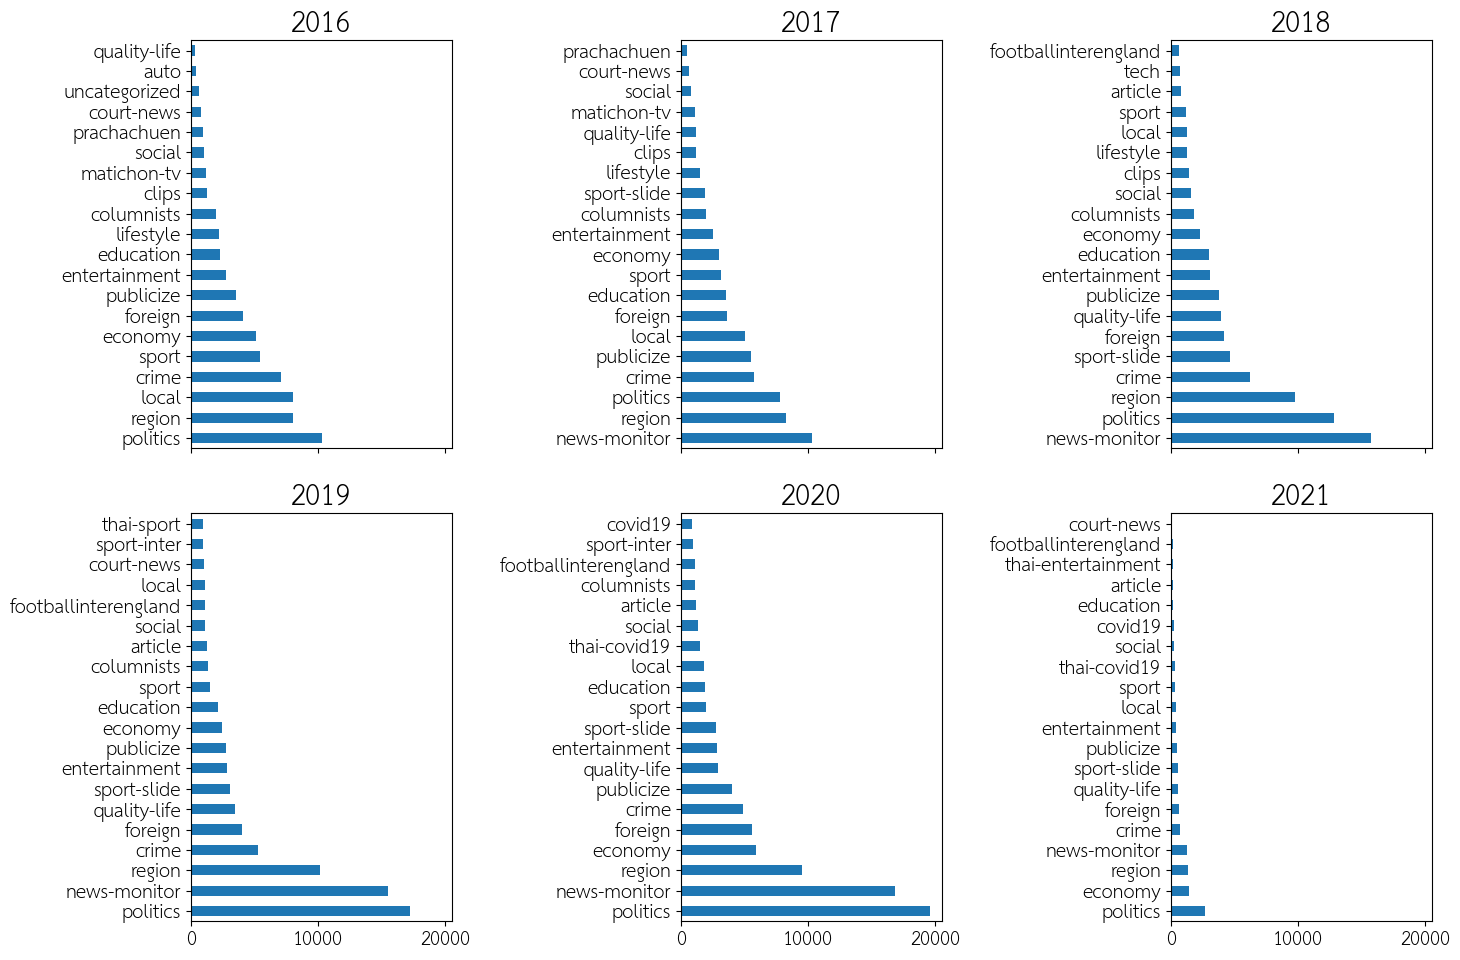

In [28]:
# Number of articles by category by year
years = [2016, 2017, 2018, 2019, 2020, 2021] # Exclude 2014 and 2015 due to insufficient data

fig, axs = plt.subplots(2,3, figsize=(15,10), sharex=True)
for n, year in enumerate(years):
    plt.subplot(2,3,n+1)
    plt.title(year, size=30)
    plt.tight_layout()
    matichon[matichon['date'].dt.year==year]['category'].value_counts().head(20).plot(kind='barh');

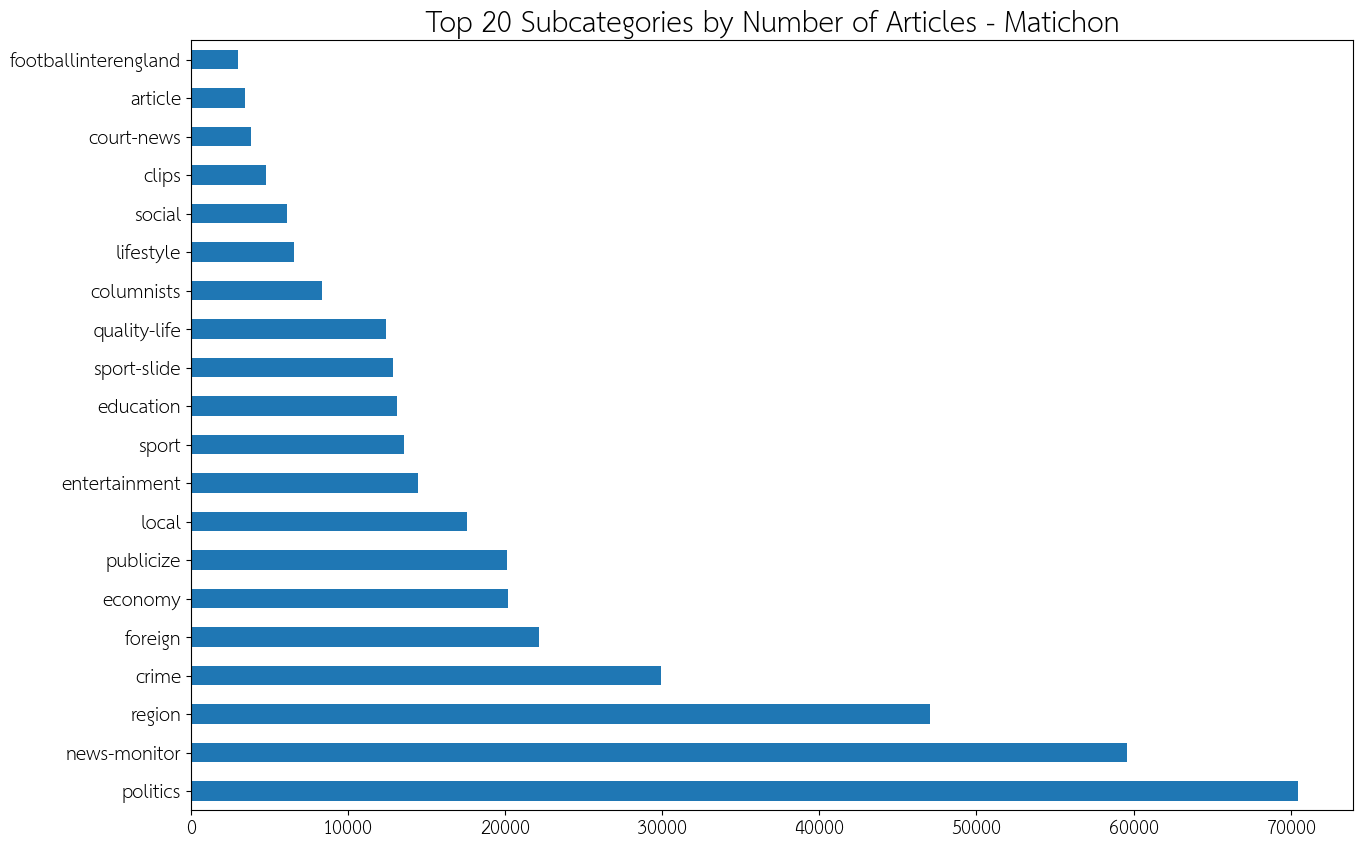

In [29]:
# Top 20 subcategories by number of articles
plt.figure(figsize=(15,10))
plt.title('Top 20 Subcategories by Number of Articles - Matichon', size=30)
matichon['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');

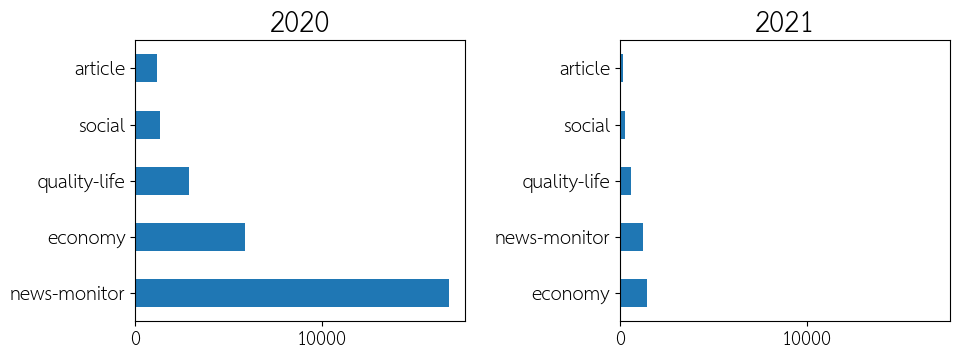

In [30]:
# Number of articles by selected 7 categories from 2020 to 2021
#fig, ax = plt.subplots(4,2, figsize=(15,30))
years = [2020, 2021]
category = ['economy', 'quality-life', 'social', 'article', 'news-monitor']

fig, axs = plt.subplots(1,2, figsize=(10,4), sharex=True)
for n, year in enumerate(years):   
    plt.subplot(1,2,n+1)
    plt.title(year, size=30)
    matichon[(matichon['date'].dt.year==year) & (matichon['category'].isin(category))]['category'].value_counts().head(20).plot(kind='barh')
    plt.tight_layout();

**Key Findings**
- Matichon dataset tends to show more consistent on the number of sub-categories 
- However, the data are complete only from 2016-2020
- Hence, if this dataset will be used in line with BangkokBiz dataset, the new dataset should only include only 2020 because there are sufficient and comparable data on both datasets.
- The sub-categories that are comparable with the one from Bangkok-Biz are as followed:
    1) Economy
    2) News-monitor
    3) Quality-life
    4) Social
    5) Article (opinions and analysis)
    

### 4. Pre-Processing
---

Pre-processing is very important when working with text data. Sentences must be tokenized, stop words removed (words that is highly significant in terms of grammer and structure and hence occurs often in a text but contain least semantic value) and filtered by regular expressing, where only A to z, Thai characters, vowels and tonal markers will be included. Numbers, both Thai and Arabic, will not be considered in this dataset. <br>

Pre-processing workflow is as follow:
1. Tokenize + remove stop words + RegEx (regular expression)
2. Feature engineering: Count words in 'title', 'description', 'article' (body) 
3. Create new DataFrame 

In [31]:
# Create function that tokenize, remove stopwords and perform RegularExpression
def tokenize(txt):
  
    ''' 
    Description:
        A function that returns tokenized words with stop words and other regular expressions 
        that do not match English and Thai alphabets removed

    Parameters:
        txt = text string

    Return:
        word tokens as list
    '''

    stopwords = thai_stopwords()
    tokens = word_tokenize(txt, keep_whitespace = False)
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [token for token in tokens if re.match(r'[A-Za-zก-\uDe5c]+', token)]
    return tokens

In [32]:
# Write a function that perform feature engineering and generate new DataFrame 

# List of columns
cols = ['title', 'description', 'article']

def new_df(data=None):

    '''
    Description:
        A function that create a new DataFrame from existing bkkbiz corpus 
        The following new features will be created as a result of the function:
          1. word count
          2. tokenized words list
          3. tokenized words outside of a list
    Parameters:
        Name of the new DataFrame
    Returns:
        New DataFrame
    '''

    # 1. Create new DataFrame
    new_df = data.reset_index(drop=True)

    # 2. Create word count columns
    for col in tqdm(cols):
        new_df[col+'_count'] = new_df[col].\
                                apply(lambda x: len(word_tokenize(x ,keep_whitespace=False)))

        # 3. Tokenize, remove stop words, perform regular expression > ready for topic modeling
        new_df[col+'_tokenize'] = new_df[col].apply(tokenize)

    return new_df

**1.4.1 Pre-Processing - BangkokBiz**

In [33]:
# Create 'investment' dataset by combining articles in 'finance and investment' and 'finance' together
data = bkkbiz[(bkkbiz['date'].dt.year.isin(years)) & ((bkkbiz['category']=='การเงิน-การลงทุน') | (bkkbiz['category']=='การเงิน'))]
data.groupby(bkkbiz['date'].dt.year)['title'].count()
investment = new_df(data=bkkbiz)
bkkbiz.head(1)

100%|█████████████████████████████████████████| 3/3 [1:02:49<00:00, 1256.63s/it]


,ID,date,category,title,description,article,url
0,620001,2014-11-27 08:01:00,ต่างประเทศ,น้ำมันดิบปิดร่วง-คาดโอเปคไม่ลดกำลังผลิต,น้ำมันดิบปิดร่วงแตะระดับต่ำสุดในรอบ 4 ปี-คาดโอ...,สัญญาน้ำมันดิบตลาดล่วงหน้าสหรัฐ ปิดตลาดปรับตัว...,https://www.bangkokbiznews.com/news/detail/620001


In [ ]:
#  Process Data from BkkBiz
years = [2020]
bkkbiz_categories = ['เศรษฐกิจ', 'คุณภาพชีวิต-สังคม', 'ธุรกิจ', 'Data Analysis', 'ทั่วไป']
bkkbiz_dfnames = ['economic', 'life', 'business', 'data_analysis', 'general']

for category in bkkbiz_categories:
    data = bkkbiz[(bkkbiz['date'].dt.year.isin(years)) & ((bkkbiz['category']==category))]
    df_name = bkkbiz_dfnames
    df_name = new_df(data=data)
    df_name.to_json(f'../datasets/{category}_processed.json')
    print(f'Finish processing and saving "{category}" yayyy!')
    
matichon_categories = ['economy', 'quality-life', 'social', 'article', 'news-monitor']
for category in matichon_categories:
    data = matichon[(matichon['date'].dt.year.isin(years)) & ((matichon['category']==category))]
    df_name = category
    df_name = new_df(data=data)
    df_name.to_json(f'../datasets/{category}_processed.json')
    print(f'Finish processing and saving "{category}" yayyy!')

**Key findings**
- The model doesn't perform well fitting the dataset filtered by categories.
- Even though all models captures the topics correctly, it seems that it failed at filtering the digital indicators-related articles.
- Hence, I decided to filter the new datasets by keyword.
- The new dataset only contains articles that contains keyword 'ดิจิทัล' (digital)

In [ ]:
# Filter articles that contains the word 'ดิจิทัล' (digital)
bkkbiz_digital = bkkbiz[bkkbiz['article'].str.contains(pat='ดิจิทัล')].reset_index(drop=True)
matichon_digital = matichon[matichon['article'].str.contains(pat='ดิจิทัล')].reset_index(drop=True)

In [ ]:
# Process Data from BkkBiz that contains the word 'ดิจิทัล'(digital)
bkkbiz_digital_processed = new_df(bkkbiz_digital)
bkkbiz_digital_processed.to_json('../datasets/bkkbiz_digital_processed.json')

In [ ]:
# Process Data from BkkBiz that contains the word 'ดิจิทัล'(digital)
cols = ['title', 'article']

matichon_digital = new_df(data=matichon_digital)
matichon_digital.to_json(f'../datasets/matichon_digital_processed.json')

**Key Fingings**
- The model perform much better when fitting on the current datasets filtered by keyword 'ดิจิทัล' (digital)
- This will be used as out final datasets

**Final Datasets**
- Articles from **BangkokBiz and Matichon** from **2020** that contains the **keyword 'ดิจิทัล' (digital)**.